# PROJEKTNA NALOGA - TED talks


**Paola Blašković**

V projektni nalogi analiziran je TED talks dataset. Skup podataka TED talks vsebuje podatke o 2550 videih zbranih na strani TED.com v obdobju do 21. septembra 2017. Videi so posnamljeni v obdobju od 1994. do 2017. leta
<img src="TED.png"></img>

 
TED je neprofitna organizacija posvečena širjenju idej. V predavanjima se združuju zamisli s treh različnih področij: **tehnologije**, **zabave** in **oblikovanja** = Technology, Entertainment, Design. TED deluje preko raznolikih mednarodnih pobud in aktivnosti. Na vsakoletni TED konferenci vodilni svetovni misleci in akterji svoje znanje posredujejo v 3 do 18 minut dolgih nastopih. Po dogodku so na spletni strani TED.com njihovi govori brezplačno dostopni vsakomur.



## Podatki
Skup podatkov vsebuje dve CSV datoteki:

**ted_main.csv** - Vsebuje podatke o TED govorniki in še neke metapodatke.

Naziv|Opis|Tip podatka
---|---|---
comments|The number of first level comments made on the talk|Numeric
description|A blurb of what the talk is about|String
duration|The duration of the talk in seconds|Numeric
event|The TED/TEDx event where the talk took place|String
film_date|The Unix timestamp of the filming|Numeric
languages|The number of languages in which the talk is available|Numeric
main_speaker|The first named speaker of the talk|String
name|The official name of the TED Talk. Includes the title and the speaker|String
num_speaker|The number of speakers in the talk|Numeric
published_date|The Unix timestamp for the publication of the talk on TED.com|Numeric
ratings|A stringified dictionary of the various ratings given to the talk (inspiring, fascinating, etc.)|String
related_talks|A list of dictionaries of recommended talks to watch next|String
speaker_occupation|The occupation of the main speaker|String
tags|The themes associated with the talk|String
title|The title of the talk|String
url|The URL of the talk|String
views|The number of views on the talk|Numeric


**transcripts.csv** - Vsebuje prepis in URL povezavo do vsakeg TED videa.

Naziv|Opis|Tip podatka
---|---|---
transcript|The official English transcript of the talk|String
url|The URL of the talk|String

## Analiza podatkov TED talks
#### Glavno vprašanje, na katero se bo baziral ta notebook je "Kaj nardi en TED pogovor popularnim?" 
Kaj največ vpliva na popularnost videja? Ali lahko že pred objave videa na spletni strani lahko določimo ali on bo popularen?

Za odgovorit na to vprašanje na začetku se moramo lotit vprašanja Kaj pomeni da je video popularen?
Vemo, da je video popularen, če ima veliko število pogledov, če so ga mnogi ljudje iz različnih delov sveta pogledali. No zdaj se vprašamo, kako število komentarjev, dolžina videa, ocen in ostalih atributi vplivajo na število pogledov.

Na popularnost videa lahko vpliva tudi število jezikov v katere je video preveden, mogoče i še neki drugi atributi kot so poklic govornika, dan gdaj je objavljen na spletu, dan ali event na katerem je posnet.

V ovem notebooku bom odgovorila na ova vprašanja:
- Kateri videi imju največ **pogledov**? Kako na poglede vplivaju razni atributi podatkovnega niza TED talk?
- Koliko so v povprečju **dolgi** govori? Kako dolžina videa vpliva na ostale atribute?
- Kateri videi so največ **komentirani**? Koje teme provociraju največ komentarov? 
- Koje so najbolj pogoste **teme** govornikov? Kako se spremljaju teme čez čas?
- V katerih mesecih je prikazovano največ videa? Gdaj so posnamljeni najbolj populrani vidje? Kateri dn v tednu je najboljši za objavo videa?  
- Govorniki - kako njihova popularnost vpliva na popularnost videa? 

Sigurno je da videi koji so na snimani prije veliko leta bojo imeli več pogledov. Menim da najpogosteje komentirani videi bojo govorili o politiki in znanosti. Verjetno je da v zimskih mesecev videi bodo več pregledani. A okupacija govornika verjetno bo povezana z temo govora. 

## Priprava podatkov
Na začetku sem naložila podatke in ih pripravila za analizo. Vse datume sem iz timestamp oblike pretvorila v oblik ki se lahko bere. Dolžino videa sem pretvorila v minute.


In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import datetime
import time
import seaborn as sns

In [2]:
cols = ['comments', 'description', 'duration', 'event', 'film_date', 'languages', 'main_speaker', 'name', 'num_speaker', 'published_date', 'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title', 'url', 'views']
ted = pd.read_csv('data/ted_main.csv', sep=',', names=cols, skiprows=1, encoding='utf-8')

t_cols = ['transcript', 'url']
transcripts = pd.read_csv('data/transcripts.csv', sep=',',names=t_cols, skiprows=1, encoding='utf-8')

In [3]:
ted['film_date'] = ted['film_date'].apply(lambda x: datetime.datetime.fromtimestamp(int(x)).strftime('%d-%m-%Y'))
ted['published_date'] = ted['published_date'].apply(lambda x: datetime.datetime.fromtimestamp(int(x)).strftime('%d-%m-%Y'))
ted['duration']=ted['duration'].div(60).round(2)

In [4]:
ted.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,19.40,TED2006,25-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,27-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,16.28,TED2006,25-02-2006,43,Al Gore,Al Gore: Averting the climate crisis,1,27-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,21.43,TED2006,24-02-2006,26,David Pogue,David Pogue: Simplicity sells,1,27-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",18.60,TED2006,26-02-2006,35,Majora Carter,Majora Carter: Greening the ghetto,1,27-06-2006,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,19.83,TED2006,22-02-2006,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,27-06-2006,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [5]:
ted.corr()

,comments,duration,languages,num_speaker,views
comments,1.000000,0.140712,0.318284,-0.035489,0.530939
duration,0.140712,1.000000,-0.295687,0.022249,0.048754
languages,0.318284,-0.295687,1.000000,-0.063100,0.377623
num_speaker,-0.035489,0.022249,-0.063100,1.000000,-0.026389
views,0.530939,0.048754,0.377623,-0.026389,1.000000


Za začetak je dobro videt kakšna je koorelacija med podatkima. 
 - Lahko vidimo da je koorelacija med številom pogleda in komentarja zelo velika
 - Dolžina videa več vpliva na število komentarov kot na število pogledov
 - Število govornikov nima značajnega vpliva na druge atribute
 - Broj jezika na katere je video prevajan vpliva na število pogledov in komentarov
 
Na začetku bom prikazala neke od atributov ovega podatkovnega niza in njihove disribucije med podatki.

## Trajanje(dolžina) videa

In [6]:
max_duration = ted[['title', 'main_speaker', 'duration', 'comments', 'views']].sort_values('duration', ascending=False)[:50]
mean_duration = ted['duration'].mean()
median_duration = ted['duration'].median()
print(mean_duration)
print(median_duration)
max_duration.head()

13.775152941176481
14.13


,title,main_speaker,duration,comments,views
640,"Parrots, the universe and everything",Douglas Adams,87.60,101,473220
588,Really achieving your childhood dreams,Randy Pausch,76.45,124,564781
629,Physics is fun to imagine,Richard Feynman,65.92,146,521974
2387,Nationalism vs. globalism: the new political d...,Yuval Noah Harari,60.13,345,1514291
594,Stories of Haiti,Edwidge Danticat,59.55,20,50443


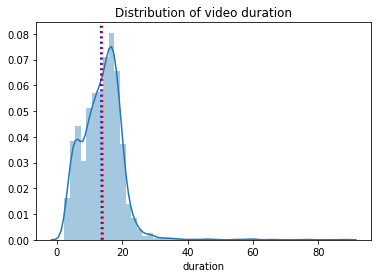

In [7]:
sns.distplot(ted[ted['duration'] < 100]['duration']).set_title("Distribution of video duration")
plt.plot([mean_duration, 0], [0, 4], 'b:', linewidth=2)
plt.plot([median_duration, 0], [0, 4], 'r:', linewidth=2)

Dolžina videa je disribuirana po normalni distibuciji, videji so v povprečju dolgi od 8 do 20 minut.

## Število komentarjev

In [8]:
max_comments = ted[['title', 'main_speaker', 'comments', 'views', 'duration']].sort_values('comments', ascending=False)[:20]
mean_comments = ted['comments'].mean()
median_comments = ted['comments'].median()
print("Povprečno število komentarjev: {0:.2f}".format(mean_comments))
print("Median komentarjev: {0:.3f}".format(median_comments))
max_comments.head()

Povprečno število komentarjev: 191.56
Median komentarjev: 118.000


,title,main_speaker,comments,views,duration
96,Militant atheism,Richard Dawkins,6404,4374792,29.17
0,Do schools kill creativity?,Ken Robinson,4553,47227110,19.40
644,Science can answer moral questions,Sam Harris,3356,3433437,23.10
201,My stroke of insight,Jill Bolte Taylor,2877,21190883,18.32
1787,How do you explain consciousness?,David Chalmers,2673,2162764,18.62


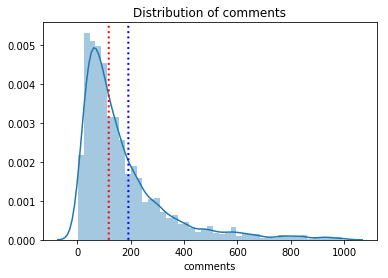

In [9]:
sns.distplot(ted[ted['comments'] < 1000]['comments']).set_title("Distribution of comments")
plt.plot([mean_comments, 0], [0, 4], 'b:', linewidth=2)
plt.plot([median_comments, 0], [0, 4], 'r:', linewidth=2)

Distribucija števila komentarov je normalna distribucija, videi v povprečju imajo 190 komentarjev. 

## Oznake / Teme TED talkov

Vsak TED talk ima en skup dodeljenih oznak - one pomenijo o kojih temah se govori v tem videu. Gdaj ih malo proučimo lahko vidimo da teme TED talkov niso samo z področja tehnologije, oblikovanja in edukacije več so se veliko razširile. Neke od tema talkov so: climate change in drugi problemi v svetu, glasba, LGTB,...



In [10]:
def clean(word): 
    w = ''
    for ch in word:  
        if ch not in '[]!.?":;\n\'': 
            w += ch
    return w

cleanTags = []
a=ted.tags
for i in a:
    d = clean(i)
    cleanTags.append(d)
    
tag = []
for t in cleanTags:
    a = t.split(', ')
    for b in a:
        tag.append(b)
    
len(set(tag))
tagsAll=set(tag)
t = {c: tag.count(c) for c in tag}

tagsData=pd.DataFrame(list(t.items()), columns=['tags', 'num_tags'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

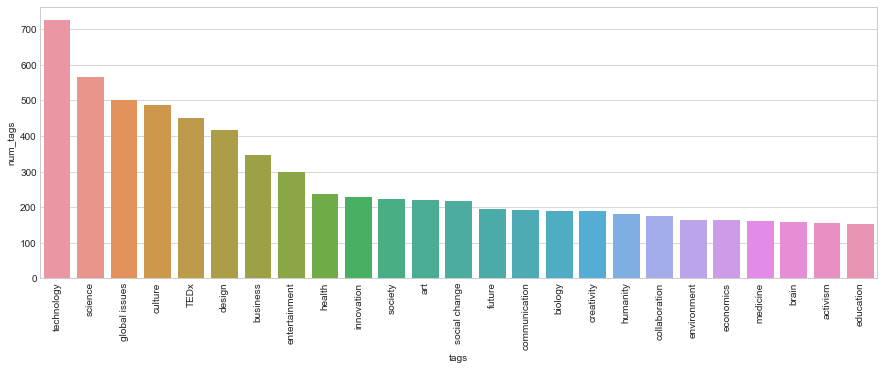

In [11]:
tagsData['num_tags'] = tagsData['num_tags'].astype('int')
td=tagsData.sort_values(by='num_tags', ascending=False)

td = tagsData[tagsData['num_tags'] >= 150].sort_values(by='num_tags', ascending=False)
sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
sns.barplot(x='tags', y='num_tags', data=td)
plt.xticks(rotation=90)

## Največ pogledani videi

Iskala sem kateri so videi najbolj popularni - kateri imajo največ pogledov in kakšen vpliv ima veliko število pogledov na ostale atribute.

Za **popularne videe** sem vzela **50** največ gledanih videov.

In [12]:
max_views = ted.sort_values('views', ascending=False)[:50]
mean_views = ted['views'].mean()
median_views = ted['views'].median()
print("Povprečno število pregledov videa: {0:.2f}".format(mean_views))
print("Median pregledov: {0:.2f}".format(median_views))
mean_v_duration = max_views['duration'].mean()
print("Povprečna dolžina trajanja popularnih videa: {0:.2f}".format(mean_v_duration))
max_views.head(10)

Povprečno število pregledov videa: 1698297.48
Median pregledov: 1124523.50
Povprečna dolžina trajanja popularnih videa: 15.30


,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,19.40,TED2006,25-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,27-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1346,2290,"Body language affects how others see us, but i...",21.03,TEDGlobal 2012,26-06-2012,51,Amy Cuddy,Amy Cuddy: Your body language may shape who yo...,1,01-10-2012,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 605, 'hero': 'https://pe.tedcdn.com/im...",Social psychologist,"['body language', 'brain', 'business', 'psycho...",Your body language may shape who you are,https://www.ted.com/talks/amy_cuddy_your_body_...,43155405
677,1930,Simon Sinek has a simple but powerful model fo...,18.07,TEDxPuget Sound,17-09-2009,45,Simon Sinek,Simon Sinek: How great leaders inspire action,1,04-05-2010,"[{'id': 21, 'name': 'Unconvincing', 'count': 9...","[{'id': 814, 'hero': 'https://pe.tedcdn.com/im...",Leadership expert,"['TEDx', 'business', 'entrepreneur', 'leadersh...",How great leaders inspire action,https://www.ted.com/talks/simon_sinek_how_grea...,34309432
837,1927,Brené Brown studies human connection -- our ab...,20.32,TEDxHouston,06-06-2010,52,Brené Brown,Brené Brown: The power of vulnerability,1,23-12-2010,"[{'id': 10, 'name': 'Inspiring', 'count': 2144...","[{'id': 1391, 'hero': 'https://pe.tedcdn.com/i...",Vulnerability researcher,"['TEDx', 'communication', 'culture', 'depressi...",The power of vulnerability,https://www.ted.com/talks/brene_brown_on_vulne...,31168150
452,354,"""Bonk"" author Mary Roach delves into obscure s...",16.72,TED2009,06-02-2009,37,Mary Roach,Mary Roach: 10 things you didn't know about or...,1,20-05-2009,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 16, 'hero': 'https://pe.tedcdn.com/ima...",Writer,"['books', 'culture', 'history', 'humor', 'scie...",10 things you didn't know about orgasm,https://www.ted.com/talks/mary_roach_10_things...,22270883
1776,297,"Have you ever felt like you're talking, but no...",9.97,TEDGlobal 2013,10-06-2013,45,Julian Treasure,Julian Treasure: How to speak so that people w...,1,27-06-2014,"[{'id': 24, 'name': 'Persuasive', 'count': 267...","[{'id': 1200, 'hero': 'https://pe.tedcdn.com/i...",Sound consultant,"['culture', 'sound', 'speech']",How to speak so that people want to listen,https://www.ted.com/talks/julian_treasure_how_...,21594632
201,2877,Jill Bolte Taylor got a research opportunity f...,18.32,TED2008,27-02-2008,49,Jill Bolte Taylor,Jill Bolte Taylor: My stroke of insight,1,12-03-2008,"[{'id': 22, 'name': 'Fascinating', 'count': 14...","[{'id': 184, 'hero': 'https://pe.tedcdn.com/im...",Neuroanatomist,"['biology', 'brain', 'consciousness', 'global ...",My stroke of insight,https://www.ted.com/talks/jill_bolte_taylor_s_...,21190883
5,672,"Tony Robbins discusses the ""invisible forces"" ...",21.75,TED2006,02-02-2006,36,Tony Robbins,Tony Robbins: Why we do what we do,1,27-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 1102}, {'...","[{'id': 229, 'hero': 'https://pe.tedcdn.com/im...",Life coach; expert in leadership psychology,"['business', 'culture', 'entertainment', 'goal...",Why we do what we do,https://www.ted.com/talks/tony_robbins_asks_wh...,20685401
2114,150,"Suspicious emails: unclaimed insurance bonds, ...",9.80,TEDGlobal>Geneva,08-12-2015,43,James Veitch,James Veitch: This is what happens when you re...,1,08-01-2016,"[{'id': 7, 'name': 'Funny', 'count': 7731}, {'...","[{'id': 2236, 'hero': 'https://pe.tedcdn.com/i...",Comedian and writer,"['comedy', 'communication', 'curiosity', 'humo...",This is what happens when you reply to spam email,https://www.ted.com/talks/james

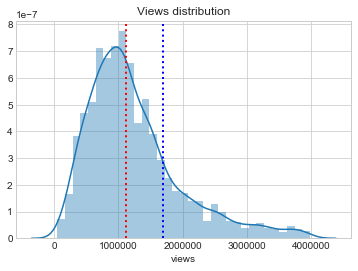

In [13]:
sns.distplot(ted[ted['views'] < 0.4e7]['views']).set_title("Views distribution")
plt.plot([mean_views, 0], [0, 4], 'b:', linewidth=2)
plt.plot([median_views, 0], [0, 4], 'r:', linewidth=2)

Gdaj pogledano kako je distribuirano število pregledov lahko ugotovimo da podobno **normalni distribuciji**. Videi imajo v povprečju 1,7 milionov pogleda.

### Pogledi -- Število komentarjev

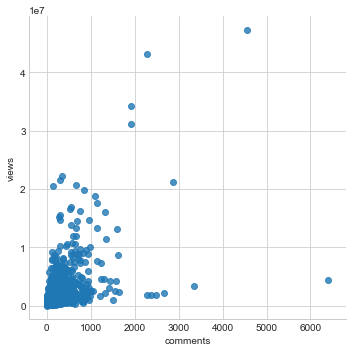

In [14]:
sns.lmplot('comments', 'views', data=ted, fit_reg=False)

Iz scatter plot grafa med številom pogledov in komentarje vidimo da so večinoma v dobri koorelaciji razen par outlinerov:
 - video ki ima več kot 6000 komentarov in relativno malo pregledov
 - video ki ima več kot 4 miliona pregledov
 - video ki ima več kot 2 miliona pregledov in manj kot 500 komentarov
 
Zanimivo je videt kateri so to videi in koji je razlog da tako izstopaju iz množice.

In [15]:
ted[ted['comments'] > 3000][['title', 'main_speaker', 'views', 'tags']]

,title,main_speaker,views,tags
0,Do schools kill creativity?,Ken Robinson,47227110,"['children', 'creativity', 'culture', 'dance',..."
96,Militant atheism,Richard Dawkins,4374792,"['God', 'atheism', 'culture', 'religion', 'sci..."
644,Science can answer moral questions,Sam Harris,3433437,"['culture', 'evolutionary psychology', 'global..."


Video ki ima več kot 600 pregledov je **Militant atheism** in bavi se temama religije in znanosti pa je zelo logično da ima veliko komentarov.
**Science can answer moral question** je še en video ki ima zelo veliko število komentarov. Tema videa je o povezavi med znanostjo in moralom. To je vedno tema za rasprave med ljudjem pa je spet logično da ima veliko komentarov.

In [16]:
ted[ted['views'] > 2e7][['title', 'main_speaker', 'comments', 'tags']]

,title,main_speaker,comments,tags
0,Do schools kill creativity?,Ken Robinson,4553,"['children', 'creativity', 'culture', 'dance',..."
5,Why we do what we do,Tony Robbins,672,"['business', 'culture', 'entertainment', 'goal..."
201,My stroke of insight,Jill Bolte Taylor,2877,"['biology', 'brain', 'consciousness', 'global ..."
452,10 things you didn't know about orgasm,Mary Roach,354,"['books', 'culture', 'history', 'humor', 'scie..."
677,How great leaders inspire action,Simon Sinek,1930,"['TEDx', 'business', 'entrepreneur', 'leadersh..."
837,The power of vulnerability,Brené Brown,1927,"['TEDx', 'communication', 'culture', 'depressi..."
1346,Your body language may shape who you are,Amy Cuddy,2290,"['body language', 'brain', 'business', 'psycho..."
1776,How to speak so that people want to listen,Julian Treasure,297,"['culture', 'sound', 'speech']"
2114,This is what happens when you reply to spam email,James Veitch,150,"['comedy', 'communication', 'curiosity', 'humo..."


Veliko gledani videi ki imajo malo komentarov ali govorijo o nekih tabu temah, ali teme niso dovolj zanimive ljudjem za komentirat o njimi.

### Pogledi -- Trajanje videa

Popularni videji so v povpreču dolgi 15 min, vsi zelo dolgi videji imajo majhno število pogledov, zraven pa popularni videi su dolgi okol 20 minut.

In [17]:
views_duration = max_views[['title', 'duration', 'views']].sort_values('views', ascending=False)[:50]
mean_duration = max_views['duration'].mean()

print(mean_duration)
views_duration.head(10)

15.295000000000007


,title,duration,views
0,Do schools kill creativity?,19.40,47227110
1346,Your body language may shape who you are,21.03,43155405
677,How great leaders inspire action,18.07,34309432
837,The power of vulnerability,20.32,31168150
452,10 things you didn't know about orgasm,16.72,22270883
1776,How to speak so that people want to listen,9.97,21594632
201,My stroke of insight,18.32,21190883
5,Why we do what we do,21.75,20685401
2114,This is what happens when you reply to spam email,9.80,20475972
1416,"Looks aren't everything. Believe me, I'm a model.",9.62,19787465


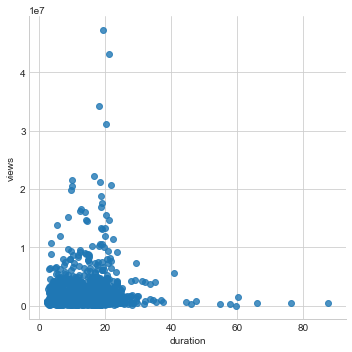

In [18]:
sns.lmplot('duration', 'views', data=ted, fit_reg=False)

Lahko vidimo da dolžina videa ne vpliva na število pregledov. Edino kaj lahko iz tega izvedemo je da najbolj popularni videji so dolgi okol 20 minut.

### Pogledi -- Poklic govornika

Iz grafa lahko vidimo da govorniki zelo popularnih videa imajo večinoma normalne poklice kot os psiholog, neurokirurg ampak zelo so gledani i videi ljudi z poklicimo kot so: Relationship therapist, Activist, Researcher, Psychiatrist, psychoanalyst and Zen priest, Visionary. 
Zelo mi je bil zanimiv za poklic Zen priest in Visionary pogledat kateri so to videi:
- __[Robert Waldinger: What makes a good life?](https://www.ted.com/talks/robert_waldinger_what_makes_a_good_life_lessons_from_the_longest_study_on_happiness)__
- __[Steve Jobs: How to live before you die](https://www.ted.com/talks/steve_jobs_how_to_live_before_you_die)__

Oba videa so zelo inspirativna in je zarad tega logično da imajo veliko pregledov.
	


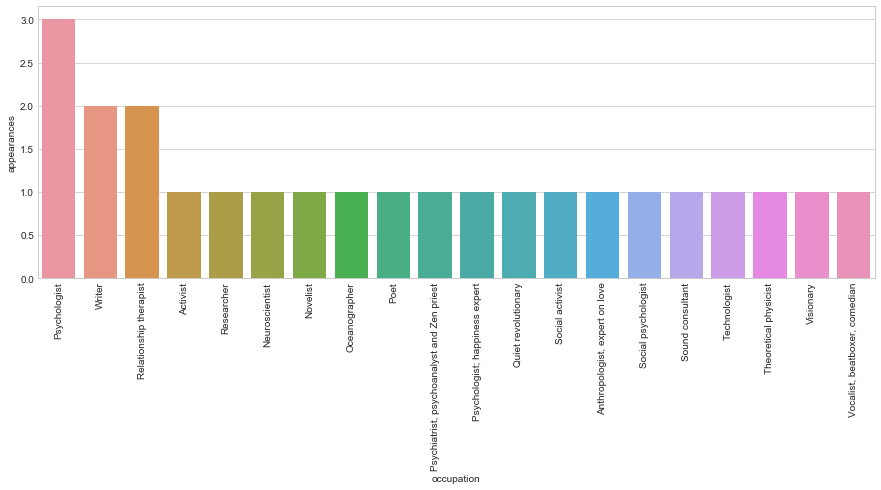

                                    occupation  appearances
30                                Psychologist            3
43                                      Writer            2
33                      Relationship therapist            2
0                                     Activist            1
34                                  Researcher            1
25                              Neuroscientist            1
26                                    Novelist            1
27                               Oceanographer            1
28                                        Poet            1
29  Psychiatrist, psychoanalyst and Zen priest            1
31              Psychologist; happiness expert            1
32                         Quiet revolutionary            1
35                             Social activist            1
1               Anthropologist, expert on love            1
36                         Social psychologist            1
37                            Sound cons

In [19]:
max_occupation = max_views.groupby('speaker_occupation').count().reset_index()[['speaker_occupation', 'comments']]
max_occupation.columns = ['occupation', 'appearances']
max_occupation = max_occupation.sort_values('appearances', ascending=False)
plt.figure(figsize=(15,5))
sns.barplot(x='occupation', y='appearances', data=max_occupation.head(20))
plt.xticks(rotation=90)
plt.show()

print(max_occupation.head(20))

In [20]:
ZenPriest = ted['speaker_occupation'] == "Psychiatrist, psychoanalyst and Zen priest"
Visionary = ted['speaker_occupation'] == "Visionary"
ted[ZenPriest | Visionary]

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
1030,1627,At his Stanford University commencement speech...,15.07,Stanford University,12-06-2005,0,Steve Jobs,Steve Jobs: How to live before you die,1,06-10-2011,"[{'id': 10, 'name': 'Inspiring', 'count': 1729...","[{'id': 848, 'hero': 'https://pe.tedcdn.com/im...",Visionary,"['business', 'computers', 'creativity', 'death...",How to live before you die,https://www.ted.com/talks/steve_jobs_how_to_li...,8744428
2109,527,What keeps us happy and healthy as we go throu...,12.77,TEDxBeaconStreet,14-11-2015,43,Robert Waldinger,Robert Waldinger: What makes a good life? Less...,1,23-12-2015,"[{'id': 10, 'name': 'Inspiring', 'count': 8590...","[{'id': 1669, 'hero': 'https://pe.tedcdn.com/i...","Psychiatrist, psychoanalyst and Zen priest","['TEDx', 'aging', 'data', 'friendship', 'happi...",What makes a good life? Lessons from the longe...,https://www.ted.com/talks/robert_waldinger_wha...,16601927


### Gdaj so objavljeni na spletni strani 50 najbolj popularnih videja? 

Vidimo da je največ populrnih videa objavljeno leta **2013**, dok je **marec** očitno najboljši mesec za objavo videa. Najboljši dan v tednu za objavo videa je **petek**, najbolj bedni dni so pa sobota in nedelja.

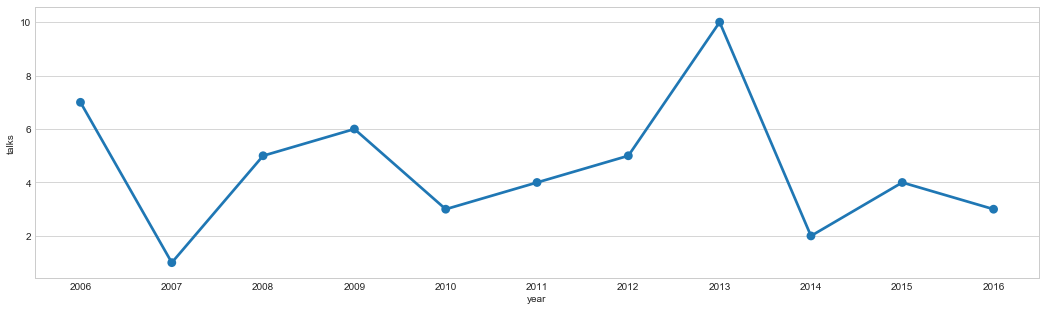

In [21]:
max_views['year'] = max_views['published_date'].apply(lambda x: x.split('-')[2])
max_year = pd.DataFrame(max_views['year'].value_counts().reset_index())
max_year.columns = ['year', 'talks']
plt.figure(figsize=(18,5))
sns.pointplot(x='year', y='talks', data=max_year)

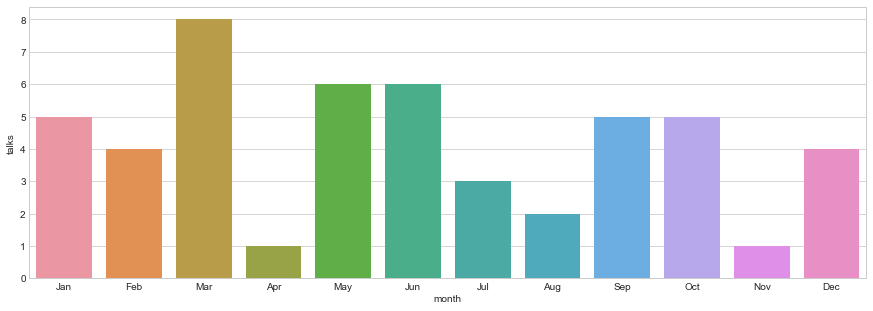

In [22]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

ted['month'] = max_views['published_date'].apply(lambda x: month_order[int(x.split('-')[1]) - 1])

max_month = pd.DataFrame(ted['month'].value_counts()).reset_index()
max_month.columns = ['month', 'talks']
plt.figure(figsize=(15,5))
sns.barplot(x='month', y='talks', data=max_month, order=month_order)

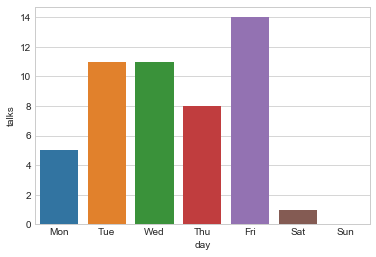

In [23]:
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

def getday(x):
    day, month, year = (int(i) for i in x.split('-'))    
    answer = datetime.date(year, month, day).weekday()
    return day_order[answer]

max_views['day'] = max_views['published_date'].apply(getday)
max_day = pd.DataFrame(max_views['day'].value_counts()).reset_index()
max_day.columns = ['day', 'talks']
sns.barplot(x='day', y='talks', data=max_day, order=day_order)

### Z katerim temema se bavijo najbolj popularni videji?

Najbolj popularni videi govorijo o temah kot so kultura, psihologija, zabava, business, ...

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

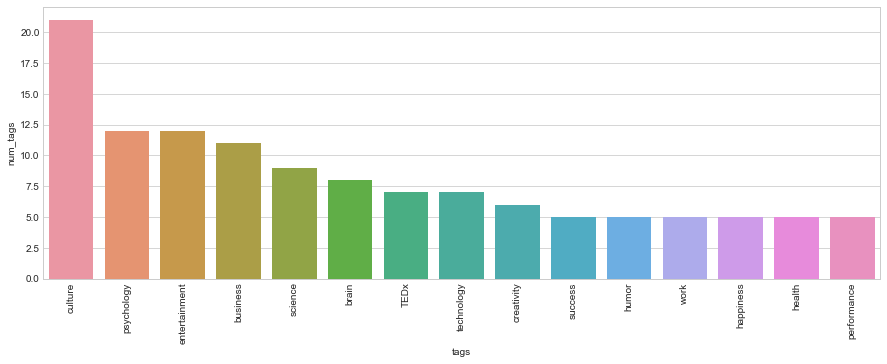

In [24]:
def clean(word): 
    w = ''
    for ch in word:  
        if ch not in '[]!.?":;\n\'': 
            w += ch
    return w

cleanTags = []
a=max_views['tags']
for i in a:
    d = clean(i)
    cleanTags.append(d)
    
tag = []
for t in cleanTags:
    a = t.split(', ')
    for b in a:
        tag.append(b)
    
len(set(tag))
tagsAll=set(tag)
t = {c: tag.count(c) for c in tag}

max_tags=pd.DataFrame(list(t.items()), columns=['tags', 'num_tags'])

max_tags['num_tags'] = max_tags['num_tags'].astype('int')
td=max_tags.sort_values(by='num_tags', ascending=False)

max_td = max_tags[max_tags['num_tags'] >= 5].sort_values(by='num_tags', ascending=False)
sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
sns.barplot(x='tags', y='num_tags', data=max_td)
#td.plot(x='tags', y='num_tags', kind='bar')
plt.xticks(rotation=90)



Ni presenetljivo, da je število komentarov očitno zelo dobro povezano s številom ogledov, tudi število jezikov na katere so videi prevedeni - vsi izvirajo iz velikog števila pregledov. Zato ni "pošteno" napovedati poglede na podlagi teh dejavnikov, v realnem svetu pa teh parametrov ne moremo uporabiti za napovedovanje, ker niso vzroki za več pogledov, ampak so tudi rezultat številnih pogledov , in vzrok v krepitvi povratne zanke: več komentarjev, bolj angažirana je skupnost okoli govora in bolj verjetna širitev; več jezikov lahko gleda več gledalcev; in več gledalcev, več občinstva je treba komentirati in prevajati. 

Lakho vidimo da na popularnost vida vpliva:
  - veliko število komentarov (kaj je zelo pričekovano - več pogledov -> več komentarov)
 - da je video preveden na več jezikov - zarad tega ga lahko gledajo ljudje ki ne govore po angleški
 - največ popularnih videa je objavljeno v četrtek
 - največ ih je objavljeno leta 2013
 - najbolj popularni videi govorijo o temah kot so kultura, psihologija, zabava, business, ...

## Videji ki so privukli največ pažnje gledalcov

To so videji koji so privukli raspravo gledalcov. 
Za prikaz ti videov sem vzela vrednost kojo sem dobila delenjem števila komentarjev z številom pregledov. Tako bom dobila neko vrednost za vsaki video ki pokazuje kateri ima največji odnost med pogledima in komentarjima.

In [25]:
ted['cool'] = ted['comments']/ted['views']
ted[['title', 'main_speaker','views', 'comments', 'cool', 'film_date']].sort_values('cool', ascending=False).head(10)

,title,main_speaker,views,comments,cool,film_date
744,The case for same-sex marriage,Diane J. Savino,292395,649,0.002220,02-12-2009
803,E-voting without fraud,David Bismark,543551,834,0.001534,14-07-2010
96,Militant atheism,Richard Dawkins,4374792,6404,0.001464,02-02-2002
694,Inside a school for suicide bombers,Sharmeen Obaid-Chinoy,1057238,1502,0.001421,10-02-2010
954,Taking imagination seriously,Janet Echelman,1832930,2492,0.001360,03-03-2011
840,On reading the Koran,Lesley Hazleton,1847256,2374,0.001285,10-10-2010
876,Curating humanity's heritage,Elizabeth Lindsey,439180,555,0.001264,08-12-2010
1787,How do you explain consciousness?,David Chalmers,2162764,2673,0.001236,18-03-2014
661,The danger of science denial,Michael Specter,1838628,2272,0.001236,11-02-2010
561,Dance to change the world,Mallika Sarabhai,481834,595,0.001235,04-11-2009


Že iz samoega naslova **The case for same-sex marriage** Lahko vidimo zakaj je taj video privukal tolik gledalcev in komentrajev.

## Snemanje videov

Naveč videov je posnamljeno februarja, januar pa avgust so meseci v katerih se zelo malo videa snema.
Lahko vidimo da se od 2004 na dalj zelo povečuje število posnamljenih videov, največ ih je bilo posnamljenih 2013.

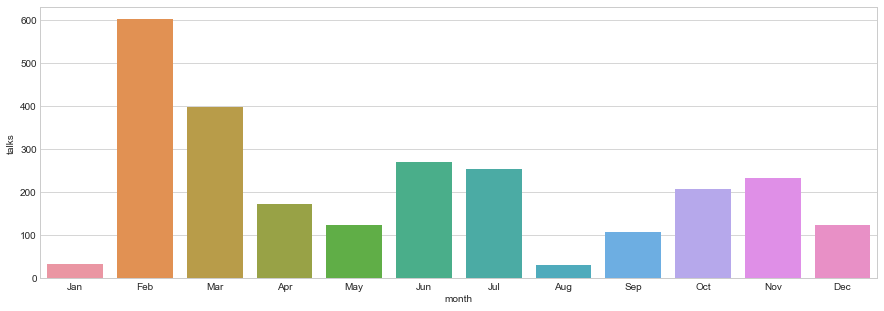

In [26]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ted['month'] = ted['film_date'].apply(lambda x: month_order[int(x.split('-')[1]) - 1])

month_ted = pd.DataFrame(ted['month'].value_counts()).reset_index()
month_ted.columns = ['month', 'talks']
plt.figure(figsize=(15,5))
sns.barplot(x='month', y='talks', data=month_ted, order=month_order)

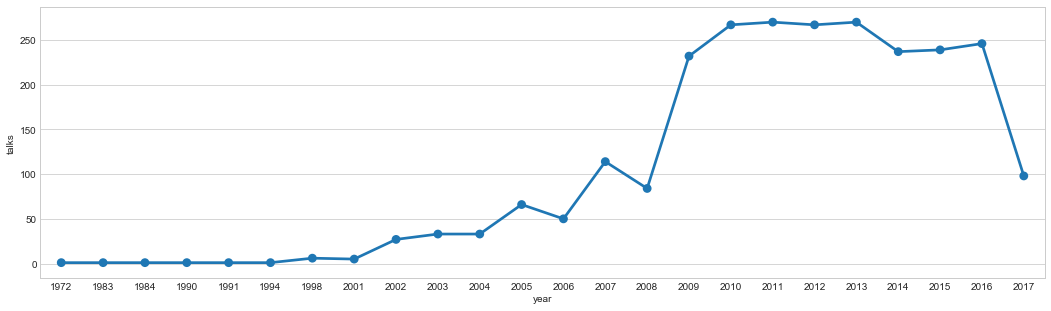

In [27]:
ted['year'] = ted['film_date'].apply(lambda x: x.split('-')[2])
year_ted = pd.DataFrame(ted['year'].value_counts().reset_index())
year_ted.columns = ['year', 'talks']

plt.figure(figsize=(18,5))
sns.pointplot(x='year', y='talks', data=year_ted)

## Speakers

Vsak video ima glavnega govornika. Lahko vidimo da večinoma so govorniki posnameli samo en video, 276 govornikov ima več kot en posnamljen video. Človek z največ TED talkov je Hans Rosling, švedski znanstvenik.

Gdaj vzamemo v obzir vse TED talke največ govornikov so po poklicu pisatelji, potem pa umetniki, dizajneri,...

In [28]:
speaker_ted = ted.groupby('main_speaker').count().reset_index()[['main_speaker', 'comments']]
speaker_ted.columns = ['main_speaker', 'appearances']
speaker_ted = speaker_ted.sort_values('appearances', ascending=False)

few=speaker_ted[speaker_ted['appearances'] > 1].count()
once=speaker_ted[speaker_ted['appearances'] == 1].count()
print(few)
print(once)

speaker_ted.head(15)

main_speaker    276
appearances     276
dtype: int64
main_speaker    1880
appearances     1880
dtype: int64


,main_speaker,appearances
770,Hans Rosling,9
1066,Juan Enriquez,7
1693,Rives,6
1278,Marco Tempest,6
397,Clay Shirky,5
1487,Nicholas Negroponte,5
1075,Julian Treasure,5
424,Dan Ariely,5
850,Jacqueline Novogratz,5
248,Bill Gates,5


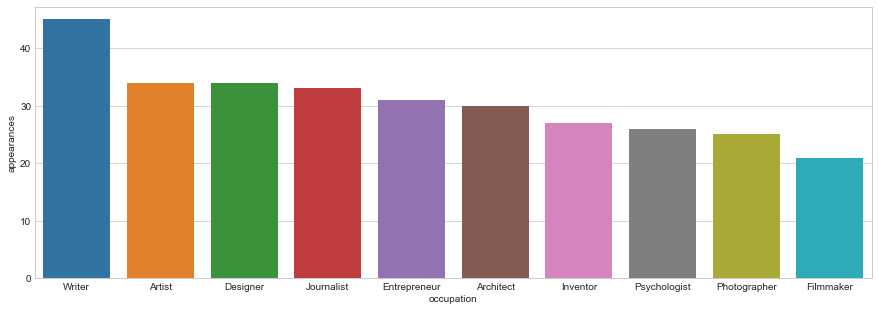

In [29]:
occupation_ted = ted.groupby('speaker_occupation').count().reset_index()[['speaker_occupation', 'comments']]
occupation_ted.columns = ['occupation', 'appearances']
occupation_ted = occupation_ted.sort_values('appearances', ascending=False)
plt.figure(figsize=(15,5))
sns.barplot(x='occupation', y='appearances', data=occupation_ted.head(10))
plt.show()

## TED Events

Največ videa je posnamljeno na velikim TED talk eventima ki se dogajajo enkrat v letu (npr. TED2009). Lahko vidimo da je na eventu TED2013 posnamljeno največ videa, kaj je logično kjer ih je v tem letu tudi največ posnamljeno.

In [30]:
ted.groupby(by=['event'])['views'].sum().sort_values(ascending=False).head(15)

event
TED2013           177307937
TED2014           174121423
TEDGlobal 2013    170554736
TED2015           150826305
TED2006           147345533
TED2009           145656385
TEDGlobal 2012    145070549
TED2012           144497608
TED2016           139571905
TED2011           137750504
TED2010           122268845
TEDGlobal 2011    116807745
TED2008           116202871
TEDGlobal 2009    109136352
TED2007           102756885
Name: views, dtype: int64

## Ratings

Spletna stran TED talks omogoča uporabnikom da na različne načine ocenijo ali opišejo kako so doživeli video. Vsak uporabnik en video lahko označi z največ 3 oznake.
Oznake so:
- OK              
- Courageous     
- Jaw-dropping 
- Inspiring      
- Informative  
- Persuasive     
- Funny        
- Ingenious      
- Obnoxious       
- Unconvincing    
- Beautiful       
- Fascinating     
- Longwinded      
- Confusing    

TED talk podatkovnem nizu ocene za vsak od videa so shranjene v atributu Ratings. Vsak video ima več ocen ki sso shranjene na način da je njihovo ime povezano z številom koje je ta video dobil za nek od oznak.

Jaz bom prikazala videe koji **fascinirali** gledalce in poiskala ali so **longwinded** videji res zelo dolgi.

In [31]:
ted.ratings[0]

"[{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': 3, 'name': 'Courageous', 'count': 3253}, {'id': 11, 'name': 'Longwinded', 'count': 387}, {'id': 2, 'name': 'Confusing', 'count': 242}, {'id': 8, 'name': 'Informative', 'count': 7346}, {'id': 22, 'name': 'Fascinating', 'count': 10581}, {'id': 21, 'name': 'Unconvincing', 'count': 300}, {'id': 24, 'name': 'Persuasive', 'count': 10704}, {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, {'id': 25, 'name': 'OK', 'count': 1174}, {'id': 26, 'name': 'Obnoxious', 'count': 209}, {'id': 10, 'name': 'Inspiring', 'count': 24924}]"

In [32]:
import ast
ted.ratings=ted.ratings.apply(lambda x:ast.literal_eval(x))

In [33]:
lab=pd.DataFrame(ted.ratings[0])
lab

,count,id,name
0,19645,7,Funny
1,4573,1,Beautiful
2,6073,9,Ingenious
3,3253,3,Courageous
4,387,11,Longwinded
5,242,2,Confusing
6,7346,8,Informative
7,10581,22,Fascinating
8,300,21,Unconvincing
9,10704,24,Persuasive


In [34]:
lab_sum=pd.DataFrame(ted.ratings.sum())
lab_count=lab_sum.groupby("name").sum()["count"].sort_values(ascending=False)
lab_count

name
Inspiring       1352048
Informative      887434
Fascinating      801119
Persuasive       561220
Beautiful        490349
Courageous       420045
Funny            393895
Ingenious        384386
Jaw-dropping     377547
OK               207157
Unconvincing     134558
Longwinded        83344
Obnoxious         66303
Confusing         53436
Name: count, dtype: int64

In [35]:
ted['fascinating'] = ted['ratings'].apply(lambda x: x[7]['count'])
ted['longwinded'] = ted['ratings'].apply(lambda x: x[4]['count'])

ted.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,...,speaker_occupation,tags,title,url,views,month,cool,year,fascinating,longwinded
0,4553,Sir Ken Robinson makes an entertaining and pro...,19.40,TED2006,25-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,27-06-2006,...,Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,Feb,0.000096,2006,10581,387
1,265,With the same humor and humanity he exuded in ...,16.28,TED2006,25-02-2006,43,Al Gore,Al Gore: Averting the climate crisis,1,27-06-2006,...,Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,Feb,0.000083,2006,413,258
2,124,New York Times columnist David Pogue takes aim...,21.43,TED2006,24-02-2006,26,David Pogue,David Pogue: Simplicity sells,1,27-06-2006,...,Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,Feb,0.000076,2006,230,104
3,200,"In an emotionally charged talk, MacArthur-winn...",18.60,TED2006,26-02-2006,35,Majora Carter,Majora Carter: Greening the ghetto,1,27-06-2006,...,Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,Feb,0.000118,2006,380,105
4,593,You've never seen data presented like this. Wi...,19.83,TED2006,22-02-2006,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,27-06-2006,...,Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,Feb,0.000049,2006,5433,110


In [36]:
ted[['main_speaker', 'title', 'views', 'film_date', 'tags', 'fascinating']].sort_values('fascinating', ascending=False)[:15]

,main_speaker,title,views,film_date,tags,fascinating
0,Ken Robinson,Do schools kill creativity?,47227110,25-02-2006,"['children', 'creativity', 'culture', 'dance',...",10581
677,Simon Sinek,How great leaders inspire action,34309432,17-09-2009,"['TEDx', 'business', 'entrepreneur', 'leadersh...",7440
4,Hans Rosling,The best stats you've ever seen,12005869,22-02-2006,"['Africa', 'Asia', 'Google', 'demo', 'economic...",5433
29,Dan Gilbert,The surprising science of happiness,14689301,02-02-2004,"['TED Brain Trust', 'brain', 'choice', 'cultur...",3899
837,Brené Brown,The power of vulnerability,31168150,06-06-2010,"['TEDx', 'communication', 'culture', 'depressi...",3510
2140,Celeste Headlee,10 ways to have a better conversation,8444981,01-05-2015,"['TEDx', 'communication', 'interview', 'langua...",2853
9,Rick Warren,A life of purpose,3095993,25-02-2006,"['Christianity', 'God', 'culture', 'happiness'...",2556
30,Barry Schwartz,The paradox of choice,10000702,15-07-2005,"['business', 'choice', 'culture', 'decision-ma...",2491
23,Helen Fisher,"Why we love, why we cheat",9260764,24-02-2006,"['cognitive science', 'culture', 'evolution', ...",2106
89,Evelyn Glennie,How to truly listen,4165572,02-02-2003,"['creativity', 'entertainment', 'live music', ...",2061


Lahko vidimo da so zelo popularni videji Fascinating. Teme ki so popularne pri oznaki Fascinating so kultura, komunikacija, kreativnost,... Veliko videja koji fascinirajo ljude so snimljeni pred 2006. letom. 
__[Ken Robinson: Do schools kill creativity?](https://www.ted.com/talks/ken_robinson_says_schools_kill_creativity)__ je daleko najbolj fascinanten video. Govornik razlaga o tem kako je zelo pomembna celotna sprememba šolstva, drugačji načini učenja učencev so nujni.

In [37]:
ted[['main_speaker', 'title', 'views', 'duration', 'film_date', 'longwinded']].sort_values('longwinded', ascending=False)[:15]

,main_speaker,title,views,duration,film_date,longwinded
677,Simon Sinek,How great leaders inspire action,34309432,18.07,17-09-2009,21564
837,Brené Brown,The power of vulnerability,31168150,20.32,06-06-2010,8280
201,Jill Bolte Taylor,My stroke of insight,21190883,18.32,27-02-2008,7842
1346,Amy Cuddy,Your body language may shape who you are,43155405,21.03,26-06-2012,6305
47,Richard St. John,8 secrets of success,10841210,3.50,23-02-2005,4978
1572,Kelly McGonigal,How to make stress your friend,14566463,14.47,11-06-2013,4678
2011,Johann Hari,Everything you think you know about addiction ...,7841509,14.70,16-06-2015,4219
1030,Steve Jobs,How to live before you die,8744428,15.07,12-06-2005,4151
1129,Shawn Achor,The happy secret to better work,16209727,12.33,11-05-2011,3886
2140,Celeste Headlee,10 ways to have a better conversation,8444981,11.73,01-05-2015,3599


__[Simon Sinek: How great leaders inspire action](https://www.ted.com/talks/simon_sinek_how_great_leaders_inspire_action)__
 je po ocenama gledalcev najbolj dolgočasni video. Jaz sem ga pogledala in me ni presenečil.

## Transcript

In [38]:
TEDtalk=pd.merge(ted, transcripts, on='url')
TEDtalk.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,...,tags,title,url,views,month,cool,year,fascinating,longwinded,transcript
0,4553,Sir Ken Robinson makes an entertaining and pro...,19.40,TED2006,25-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,27-06-2006,...,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,Feb,0.000096,2006,10581,387,Good morning. How are you?(Laughter)It's been ...
1,265,With the same humor and humanity he exuded in ...,16.28,TED2006,25-02-2006,43,Al Gore,Al Gore: Averting the climate crisis,1,27-06-2006,...,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,Feb,0.000083,2006,413,258,"Thank you so much, Chris. And it's truly a gre..."
2,124,New York Times columnist David Pogue takes aim...,21.43,TED2006,24-02-2006,26,David Pogue,David Pogue: Simplicity sells,1,27-06-2006,...,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,Feb,0.000076,2006,230,104,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,200,"In an emotionally charged talk, MacArthur-winn...",18.60,TED2006,26-02-2006,35,Majora Carter,Majora Carter: Greening the ghetto,1,27-06-2006,...,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,Feb,0.000118,2006,380,105,If you're here today — and I'm very happy that...
4,593,You've never seen data presented like this. Wi...,19.83,TED2006,22-02-2006,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,27-06-2006,...,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,Feb,0.000049,2006,5433,110,"About 10 years ago, I took on the task to teac..."


In [39]:
TEDtalk['transcript'] = TEDtalk['transcript'].fillna('')
TEDtalk['words'] = TEDtalk['transcript'].apply(lambda x: len(x.split()))
TEDtalk['words'].describe()

count    2467.000000
mean     2040.279287
std       956.209248
min         1.000000
25%      1332.500000
50%      2028.000000
75%      2707.000000
max      9044.000000
Name: words, dtype: float64

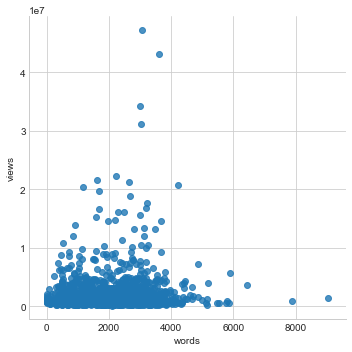

In [40]:
sns.lmplot('words', 'views', data=TEDtalk, fit_reg=False)

Lahko vidimo da ne obstaja povezava med številom besed v videju in njegovo gledanostjo, to bi lahko i pretpostavili.

In [41]:
TEDtalk['words_min'] = TEDtalk['words']/TEDtalk['duration']
TEDtalk['words_min'].describe()

count    2467.000000
mean      147.103367
std        29.941347
min         0.080841
25%       133.271720
50%       149.947644
75%       165.270430
max       247.364865
Name: words_min, dtype: float64